# More Attempts on my First NLP Model  

In this notebook I want to provide some new attempts made in my first NLP project.  

I performed more EDA and feature engineering by trying different encoding methods, so the results may be different from my first attempt, where, for example, some duplicated values were kept.  

It will need further improvement for sure.  

I am doing it on the lessons provided by the following link: https://www.youtube.com/@codebasics  

Original notebook: https://github.com/flaviobrienza/Fake_News_Classifier/blob/main/first_nlp_project.ipynb

# Importing Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style("darkgrid")
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (15, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

import warnings
warnings.simplefilter(action='ignore')

import spacy

# Importing Data

In [34]:
df =  pd.read_csv('./fake-or-real-news/fake_or_real_news.csv').drop(columns='Unnamed: 0')

df

,title,text,label
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...
6330,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


# EDA and Feature Engineering

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   6335 non-null   object
 1   text    6335 non-null   object
 2   label   6335 non-null   object
dtypes: object(3)
memory usage: 148.6+ KB


There are no missing values.

Dropping duplicated values.

In [36]:
df[df.text.duplicated(keep=False)]

,title,text,label
12,"Strong Solar Storm, Tech Risks Today | S0 News...",Click Here To Learn More About Alexandra's Per...,FAKE
14,"Trump takes on Cruz, but lightly","Killing Obama administration rules, dismantlin...",REAL
25,Anti-Trump forces seek last-ditch delegate revolt,Washington (CNN) The faction of the GOP that i...,REAL
30,GOP insiders: Carly crushed it,"On this day in 1973, J. Fred Buzhardt, a lawye...",REAL
35,Mike Pence Drapes Shawl Over Immodest Lady Jus...,Trump Raises Concern Over Members Of Urban Com...,FAKE
...,...,...,...
6227,ISIS uses an industrial dough kneader to kill ...,Email \nISIS barbarians used an industrial dou...,FAKE
6233,North Korea Threatens ‘Sacred’ Nuclear War Aga...,Email \nNorth Korea’s Foreign Ministry slammed...,FAKE
6250,Activists bristle at Clinton fundraising,A verdict in 2017 could have sweeping conseque...,REAL
6270,Inside Bernie Sanders’ unorthodox debate prep,"Killing Obama administration rules, dismantlin...",REAL


In [37]:
df = df.drop_duplicates('text')
df.shape

(6060, 3)

In [38]:
df[df.duplicated('title', keep=False)]

,title,text,label
174,"Syrian War Report – November 2, 2016: ISIS and...",Trump Whistles His Dogs ‹ › South Front Analys...,FAKE
271,The Fix Is In: NBC Affiliate Accidentally Post...,"NBC affiliate WRCB TV in Chattanooga, Tennesse...",FAKE
423,US abstains from UN vote calling for end to Cu...,US abstains from UN vote calling for end to Cu...,FAKE
451,Get Ready For Civil Unrest: Survey Finds That ...,"in: Protestors & Activists , Special Interests...",FAKE
529,"Meteor, space junk, rocket? Mysterious flash h...","Meteor, space junk, rocket? Mysterious flash h...",FAKE
...,...,...,...
6214,Tony Blair suggests a second referendum to rev...,Tony Blair suggests a second referendum to rev...,FAKE
6231,Schools All Over America Are Closing On Electi...,"in: Politics , Sleuth Journal , Special Intere...",FAKE
6303,The Deceptive Nature of Hillary Clinton is Rig...,Posted by David Risselada \nMuch to the surpri...,FAKE
6307,US abstains from UN vote calling for end to Cu...,US abstains from UN vote calling for end to Cu...,FAKE


In [39]:
df = df.drop_duplicates('title')
df.shape

(6011, 3)

Checking the class balance.

In [43]:
df.label.value_counts()

FAKE    3026
REAL    2985
Name: label, dtype: int64

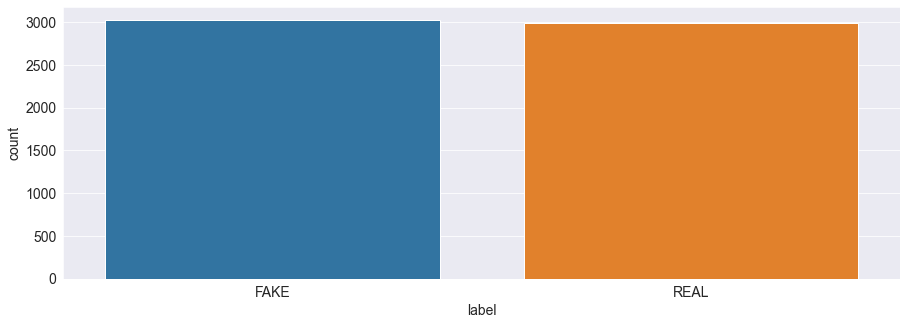

In [44]:
sns.countplot(data=df, x='label');

The dataset is almost perfectly balanced.

Checking the average length of the text for fake and real news.

In [45]:
df['text_length'] = df.text.apply(lambda x: len(x))
df

,title,text,label,text_length
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,7518
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,2646
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,2543
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,2660
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,1840
...,...,...,...,...
6330,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL,4076
6331,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE,14323
6332,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE,11974
6333,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL,6991


In [46]:
df[df.label=='FAKE'].text_length.describe(), df[df.label=='REAL'].text_length.describe()

(count      3026.000000
 mean       4179.931593
 std        5742.954547
 min           1.000000
 25%        1312.500000
 50%        2597.000000
 75%        5061.000000
 max      115372.000000
 Name: text_length, dtype: float64,
 count     2985.000000
 mean      5582.642211
 std       4293.736327
 min         43.000000
 25%       3063.000000
 50%       4841.000000
 75%       6971.000000
 max      44039.000000
 Name: text_length, dtype: float64)

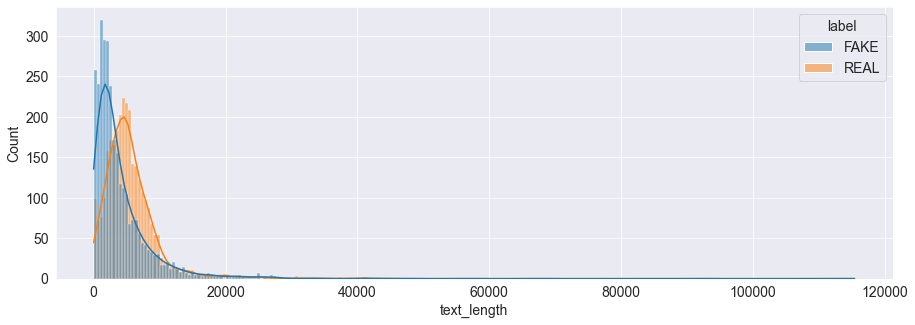

In [47]:
sns.histplot(data=df, x='text_length', hue='label', kde=True);

Real news seem to be longer than fake ones.  
Is it the same for the title?

In [48]:
df['title_length'] = df.title.apply(lambda x: len(x))
df

,title,text,label,text_length,title_length
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,7518,28
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,2646,85
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,2543,43
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,2660,84
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,1840,48
...,...,...,...,...,...
6330,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL,4076,69
6331,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE,14323,59
6332,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE,11974,66
6333,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL,6991,67


In [49]:
df[df.label=='FAKE'].title_length.describe(), df[df.label=='REAL'].title_length.describe()

(count    3026.000000
 mean       69.240251
 std        27.163359
 min         1.000000
 25%        51.000000
 50%        68.000000
 75%        84.000000
 max       289.000000
 Name: title_length, dtype: float64,
 count    2985.000000
 mean       62.627806
 std        18.661022
 min        10.000000
 25%        50.000000
 50%        62.000000
 75%        74.000000
 max       148.000000
 Name: title_length, dtype: float64)

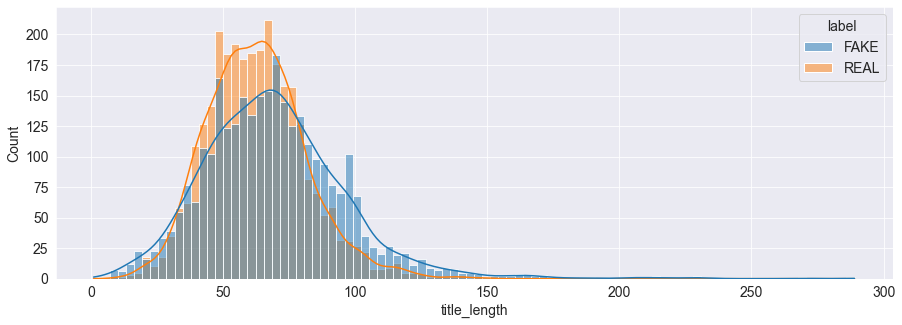

In [50]:
sns.histplot(data=df, x='title_length', hue='label', kde=True);

There is not much difference between the titles' lenght.

Changing the "label" feature into 0 and 1, where:  

- **REAL** --> 0  
- **FAKE** --> 1

In [51]:
df['label'] = df.label.map({'REAL':0, 'FAKE':1})
df.head()

,title,text,label,text_length,title_length
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",1,7518,28
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,1,2646,85
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,0,2543,43
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",1,2660,84
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,0,1840,48


Importing spacy model.

In [52]:
nlp = spacy.load('en_core_web_sm')

A first attempt to improve the result will be to remove punctuation, stop words and applying lemmatization to the sentences. 

In [54]:
def lemmit(row):
    doc = nlp(row['text'])
    lemm_list = []
    for word in doc: 
        if not word.is_punct and not word.is_stop: 
            lemm_list.append(word.lemma_) 
    return ' '.join(lemm_list)

In [55]:
df['lemmit_text'] = df.apply(lemmit, axis=1)

Saving the preprocessed df.

In [56]:
df.to_csv('preprocessed_fake_news.csv', index=None)

Showing the results.

In [57]:
df

,title,text,label,text_length,title_length,lemmit_text
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",1,7518,28,Daniel Greenfield Shillman Journalism Fellow F...
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,1,2646,85,Google Pinterest Digg Linkedin Reddit Stumbleu...
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,0,2543,43,U.S. Secretary State John F. Kerry say Monday ...
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",1,2660,84,Kaydee King @KaydeeKing November 9 2016 lesson...
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,0,1840,48,primary day New York runner Hillary Clinton Do...
...,...,...,...,...,...,...
6330,State Department says it can't find emails fro...,The State Department told the Republican Natio...,0,4076,69,State Department tell Republican National Comm...
6331,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,1,14323,59,p PBS stand plutocratic Pentagon post Oct 27 2...
6332,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,1,11974,66,Anti Trump Protesters Tools Oligarchy refor...
6333,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",0,6991,67,ADDIS ABABA Ethiopia President Obama convene m...


Splitting the dataset

In [58]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(
    df.lemmit_text, df.label,
    stratify=df.label, test_size=.2, 
    random_state=42
)

In [59]:
print(f'train shape:{X_train.shape}, test shape:{X_test.shape}')

train shape:(4808,), test shape:(1203,)


In [60]:
y_train.value_counts()

1    2420
0    2388
Name: label, dtype: int64

In [61]:
y_test.value_counts()

1    606
0    597
Name: label, dtype: int64

The last time it was used the CountVectorizer, now it will be tried the TF-IDF one. 

In [62]:
from sklearn.feature_extraction.text import TfidfVectorizer 

vectorizer = TfidfVectorizer().fit(X_train) 

X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test) 

Which are the TF-IDF scores in the training set?

In [63]:
vectorizer.vocabulary_

{'seattle': 41025,
 'police': 35690,
 'black': 6566,
 'clothe': 9891,
 'day': 12415,
 'marcher': 28698,
 'hurl': 22480,
 'wrench': 50799,
 'rock': 39454,
 'officer': 33009,
 'hit': 21819,
 'stick': 43834,
 'friday': 18542,
 'night': 32126,
 'march': 28696,
 'neighborhood': 31789,
 'turn': 47169,
 'violent': 49264,
 'injure': 23591,
 'long': 27731,
 'demonstration': 12979,
 'management': 28533,
 'riot': 39288,
 'captain': 8390,
 'chris': 9441,
 'fowler': 18317,
 'tweet': 47221,
 'respond': 38856,
 'pepper': 34724,
 'spray': 43348,
 'ball': 5358,
 'eventually': 16406,
 'arrest': 4308,
 '15': 307,
 'people': 34717,
 'protester': 36778,
 'damage': 12204,
 'dozen': 14521,
 'vehicle': 48935,
 'say': 40531,
 'destructive': 13279,
 'chief': 9309,
 'kathleen': 25512,
 'toole': 46342,
 'joint': 24983,
 'press': 36310,
 'conference': 10614,
 'mayor': 29135,
 'ed': 15105,
 'murray': 31204,
 'think': 45857,
 'professional': 36553,
 'handle': 20830,
 'situation': 42283,
 'support': 44544,
 'worker':

In [64]:
names = vectorizer.get_feature_names_out()
scores_dict = {}
words = [] 
scores = []

for word in names: 
    key = vectorizer.vocabulary_.get(word)
    score = vectorizer.idf_[key]
    words.append(word)
    scores.append(score) 

scores_dict['tf_idf_word'] = words 
scores_dict['tf_idf_score'] = scores

In [65]:
sorted_scores = pd.DataFrame(scores_dict).sort_values('tf_idf_score', ascending=False)
sorted_scores

,tf_idf_word,tf_idf_score
25983,kiryat,8.785097
35209,pierini,8.785097
35213,pies,8.785097
35214,piet,8.785097
17432,ferryman,8.785097
...,...,...
31949,new,1.606170
51072,year,1.573172
34717,people,1.572434
46099,time,1.567654


# Model Creation   

It will be used the MultinomialNB.

In [66]:
from sklearn.naive_bayes import MultinomialNB 

In [67]:
model = MultinomialNB()

model.fit(X_train, y_train) 

MultinomialNB()

## Results  

It will be printed a classification report, but even other metrics can be computed (e.g. ROC AUC).

In [68]:
from sklearn.metrics import classification_report 

print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.73      0.98      0.84       597
           1       0.97      0.64      0.77       606

    accuracy                           0.81      1203
   macro avg       0.85      0.81      0.80      1203
weighted avg       0.85      0.81      0.80      1203



Results seem worse from the first attempt. 

Other approaches could be:  

**trying tf-idf on the original text**  
**trying CountVectorizer on the preprocessed text**  
**trying Spacy word vectors**  

# Trying TF-IDF without Lemmatization

In [69]:
df

,title,text,label,text_length,title_length,lemmit_text
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",1,7518,28,Daniel Greenfield Shillman Journalism Fellow F...
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,1,2646,85,Google Pinterest Digg Linkedin Reddit Stumbleu...
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,0,2543,43,U.S. Secretary State John F. Kerry say Monday ...
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",1,2660,84,Kaydee King @KaydeeKing November 9 2016 lesson...
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,0,1840,48,primary day New York runner Hillary Clinton Do...
...,...,...,...,...,...,...
6330,State Department says it can't find emails fro...,The State Department told the Republican Natio...,0,4076,69,State Department tell Republican National Comm...
6331,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,1,14323,59,p PBS stand plutocratic Pentagon post Oct 27 2...
6332,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,1,11974,66,Anti Trump Protesters Tools Oligarchy refor...
6333,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",0,6991,67,ADDIS ABABA Ethiopia President Obama convene m...


In [77]:
X_train, X_test, y_train, y_test = train_test_split(
    df.text, df.label, 
    stratify = df.label, random_state=42
)

In [78]:
y_train.value_counts()

1    2269
0    2239
Name: label, dtype: int64

In [79]:
y_test.value_counts()

1    757
0    746
Name: label, dtype: int64

Vectorizing

In [80]:
vectorizer = TfidfVectorizer().fit(X_train) 

X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test) 

Model creation 

In [81]:
model = MultinomialNB() 

model.fit(X_train, y_train) 

MultinomialNB()

Results

In [82]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.69      0.99      0.81       746
           1       0.98      0.56      0.71       757

    accuracy                           0.77      1503
   macro avg       0.84      0.77      0.76      1503
weighted avg       0.84      0.77      0.76      1503



Without feature engineering results have worsened a lot.

# Trying CountVectorizer on the Preprocessed Text


In [83]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(
    df.lemmit_text, df.label,
    stratify=df.label, test_size=.2, 
    random_state=42
)

In [85]:
y_train.value_counts()

1    2420
0    2388
Name: label, dtype: int64

In [86]:
y_test.value_counts()

1    606
0    597
Name: label, dtype: int64

Vectorizing

In [87]:
from sklearn.feature_extraction.text import CountVectorizer 

vectorizer = CountVectorizer().fit(X_train)

X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)

Model 

In [88]:
model = MultinomialNB()

model.fit(X_train, y_train) 

MultinomialNB()

Results

In [89]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89       597
           1       0.93      0.84      0.88       606

    accuracy                           0.88      1203
   macro avg       0.89      0.88      0.88      1203
weighted avg       0.89      0.88      0.88      1203



Results are similar to the first attempt without preprocessing text.  

# Using Spacy without Preprocessing

In [2]:
nlp = spacy.load('en_core_web_lg')

Here VSCode crashed, it is always important to save files after preprocessing.

In [3]:
df = pd.read_csv('preprocessed_fake_news.csv')
df

,title,text,label,text_length,title_length,lemmit_text
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",1,7518,28,Daniel Greenfield Shillman Journalism Fellow F...
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,1,2646,85,Google Pinterest Digg Linkedin Reddit Stumbleu...
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,0,2543,43,U.S. Secretary State John F. Kerry say Monday ...
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",1,2660,84,Kaydee King @KaydeeKing November 9 2016 lesson...
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,0,1840,48,primary day New York runner Hillary Clinton Do...
...,...,...,...,...,...,...
6006,State Department says it can't find emails fro...,The State Department told the Republican Natio...,0,4076,69,State Department tell Republican National Comm...
6007,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,1,14323,59,p PBS stand plutocratic Pentagon post Oct 27 2...
6008,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,1,11974,66,Anti Trump Protesters Tools Oligarchy refor...
6009,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",0,6991,67,ADDIS ABABA Ethiopia President Obama convene m...


Creating a Spacy vector.

In [4]:
df['spacy_vector'] = df.text.apply(lambda x: nlp(x).vector)
df

,title,text,label,text_length,title_length,lemmit_text,spacy_vector
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",1,7518,28,Daniel Greenfield Shillman Journalism Fellow F...,"[-1.3751823, 1.3421849, -2.3666484, 0.12908486..."
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,1,2646,85,Google Pinterest Digg Linkedin Reddit Stumbleu...,"[-1.7449774, 0.93961924, -2.024867, 0.42536643..."
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,0,2543,43,U.S. Secretary State John F. Kerry say Monday ...,"[-1.9426425, 1.0062195, -1.9992222, 0.20469022..."
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",1,2660,84,Kaydee King @KaydeeKing November 9 2016 lesson...,"[-1.9125352, -0.1481846, -1.1432766, 0.6861217..."
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,0,1840,48,primary day New York runner Hillary Clinton Do...,"[-1.8516092, 1.3163909, -2.1726575, 1.2286776,..."
...,...,...,...,...,...,...,...
6006,State Department says it can't find emails fro...,The State Department told the Republican Natio...,0,4076,69,State Department tell Republican National Comm...,"[-1.556691, 0.60453945, -1.1016529, 0.16134764..."
6007,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,1,14323,59,p PBS stand plutocratic Pentagon post Oct 27 2...,"[-2.206026, -0.12085343, -1.0834901, 0.6655213..."
6008,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,1,11974,66,Anti Trump Protesters Tools Oligarchy refor...,"[-2.558132, 0.47698027, -1.8662019, 0.8344748,..."
6009,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",0,6991,67,ADDIS ABABA Ethiopia President Obama convene m...,"[-1.8501893, 0.6893597, -1.9594386, 0.41594952..."


Saving the model with the new feature.

In [5]:
df.to_csv('preprocessed_fake_news.csv', index=None)

In [6]:
from sklearn.model_selection import train_test_split  

X_train, X_test, y_train, y_test = train_test_split(
    df.spacy_vector, df.label, 
    stratify=df.label, random_state=42
)

In [9]:
X_train

4890    [-2.0016534, 0.007585724, -0.8894147, 0.046493...
4682    [-2.5661526, 0.43509185, -1.8436817, 0.8052051...
821     [-0.20114365, -0.7524439, -1.3927656, -1.92348...
38      [-1.2550871, 0.8170438, -1.2368673, 0.07717796...
1637    [-1.7568897, -0.12037473, -0.8760516, 0.601860...
                              ...                        
4886    [-1.8356636, 0.4669065, -1.7419188, 0.19650374...
4288    [-1.2327241, 0.8559157, -2.7709413, -0.4093651...
257     [-2.1132298, -0.17463753, -0.46453714, 0.28716...
5294    [-2.188368, 0.72217894, -1.6713092, 0.6883849,...
1849    [-1.7973229, 0.2899992, -1.4270326, 0.16144261...
Name: spacy_vector, Length: 4508, dtype: object

In [10]:
y_train.value_counts()

1    2269
0    2239
Name: label, dtype: int64

In [11]:
y_test.value_counts()

1    757
0    746
Name: label, dtype: int64

In order to work properly, the X_train should be transformed.

In [14]:
X_train = np.stack(X_train)
X_test = np.stack(X_test)

Moreover, MultinomialNB does not accept negative values.  
They will be scaled using MinMaxScaler

In [16]:
from sklearn.preprocessing import MinMaxScaler 

scaler = MinMaxScaler().fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Model 

In [21]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()

model.fit(X_train, y_train)

MultinomialNB()

Results

In [23]:
from sklearn.metrics import classification_report 

print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.76      0.84      0.80       746
           1       0.82      0.74      0.78       757

    accuracy                           0.79      1503
   macro avg       0.79      0.79      0.79      1503
weighted avg       0.79      0.79      0.79      1503



# Conclusion  

I found very useful trying different ways of preprocessing to see how the model perform using different data.  

A further implementation can be to try different classification models on the same data and providing more metrics.  

Even the feature engineering could be performed using different NLP tools.